# ☘️ TOMATO LEAF DISEASE CLASSIFICATION USING RESNET-9 ☘️

#Description of the dataset 📝¶


This dataset is created using offline augmentation from the original dataset. dataset consists of about 10000 rgb images of healthy and diseased crop leaves which is categorized into 10 different classes. The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure. 



# Our goal 🎯

Goal is clear and simple. We need to build a model, which can classify between healthy and diseased crop leaves and also if the crop have any disease, predict which disease is it.

## Importing necessary libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')
from torchvision.datasets import ImageFolder # for transforming images into tensors
from torch.utils.data import DataLoader # for dataloaders
from torchvision.utils import make_grid # for data checking
from torchvision import transforms # for transforming images into tensors 
import torch                     # Pytorch module
import torchvision
import torch.nn as nn           # for creating  neural networks
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import os                       # for working with files
import numpy as np              # for numerical computations
import pandas as pd             # for working with dataframes
from torchsummary import summary              # for getting the summary of our model
from sklearn.metrics import confusion_matrix, classification_report





Mounted at /content/drive


In [4]:

import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
## anothrr 
import numpy as np
import pandas as pd
from PIL import Image
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
import glob
import os

In [6]:
# defining default image Size
default_image_size = tuple((256, 256))

## 🧭 Loading data 🧭

In [7]:
# Get Path to Train and Valid folders
train_dir = '/content/drive/MyDrive/Tomato-leaves-dataset/train'
valid_dir = '/content/drive/MyDrive/Tomato-leaves-dataset/val'
directory_root = '/content/drive/MyDrive/Tomato-leaves-dataset'

In [8]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [9]:
image_list, label_list = [], []
try:
    print("Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"Processing {plant_disease_folder}")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}")
           
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

Loading images ...
Processing Tomato___Leaf_Mold
Processing Tomato___Late_blight
Processing Tomato___Bacterial_spot
Processing Tomato___Spider_mites Two-spotted_spider_mite
Processing Tomato___Tomato_mosaic_virus
Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus
Processing Tomato___Septoria_leaf_spot
Processing Tomato___healthy
Processing Tomato___Early_blight
Processing Tomato___Target_Spot
Processing Tomato___Target_Spot
Processing Tomato___Bacterial_spot
Processing Tomato___healthy
Processing Tomato___Tomato_mosaic_virus
Processing Tomato___Septoria_leaf_spot
Processing Tomato___Late_blight
Processing Tomato___Spider_mites Two-spotted_spider_mite
Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus
Processing Tomato___Leaf_Mold
Processing Tomato___Early_blight
Image loading completed


In [10]:


# Function to create a DataFrame with plantpath, name, etc...
def Create_DF_DataSet_Info(path):
    List_Plant=[]
    List_Category=[]
    List_Disease=[]
    List_Path=[]
    List_Plant___Category=[]
    List_Image_size=[]
    List_Image_type=[]
    List_size=[]

    for path, dirs, files in os.walk(path,topdown=False):

        for name in files:

            plant___category=category=path.split('/')[-1]
            plant=plant___category.split('___')[0]
            category=plant___category.split('___')[-1]
            disease= 0 if category=='healthy' else 1
            full_path=path+'/'+name
            Image_type=name.split('.')[-1]
            size=os.path.getsize(full_path)

            with Image.open(full_path) as img:
                width, height = img.size
            List_Plant.append(plant)
            List_Category.append(category)
            List_Disease.append(disease)
            List_Path.append(full_path)
            List_Plant___Category.append(plant___category)
            List_Image_size.append(str(width)+'x'+str(height))
            List_Image_type.append(Image_type)
            List_size.append(size)

    df_info=pd.DataFrame.from_dict({'Plant':List_Plant,'Category':List_Category,'Disease':List_Disease,'Path':List_Path,
                                    'Plant___Category':List_Plant___Category,'Image_size':List_Image_size,
                                    'Image_type':List_Image_type,"Size":List_size}, orient = 'columns')
    
    df_image_count=pd.DataFrame(df_info.groupby(['Plant','Category','Plant___Category']).size())
    df_image_count.rename(columns={0: 'nb'}, inplace=True)
    df_image_count=df_image_count.reset_index()

    return df_info,df_image_count

train_info,train_count=Create_DF_DataSet_Info(train_dir)
valid_info,valid_count=Create_DF_DataSet_Info(valid_dir)

## 🧭 Exploring the data 🧭

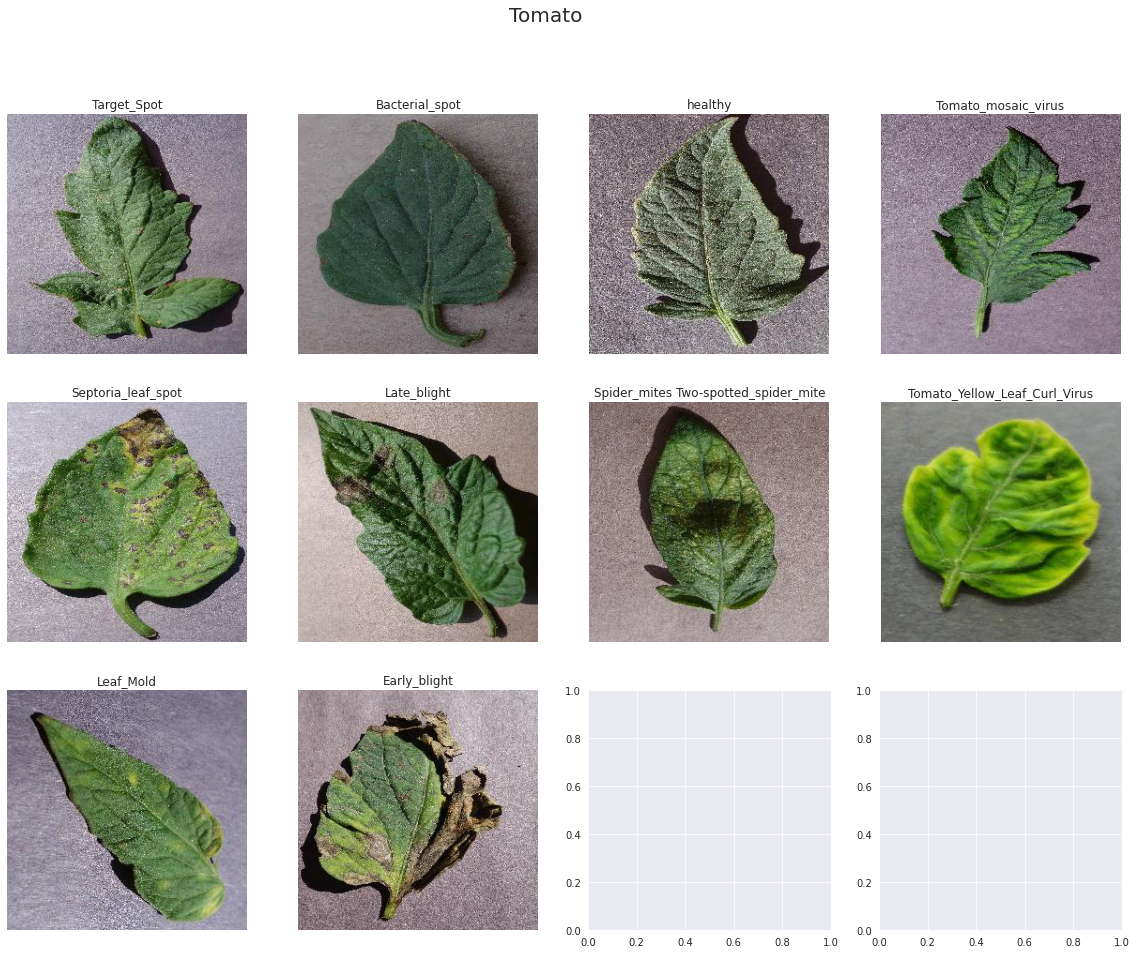

In [46]:
#Plot image for each plant category and for each plant diseases

list_plant=list(train_count.Plant.unique())

for plant in list_plant:  
    list_disease=train_info.Category[train_info['Plant']==plant].unique().tolist()
  
    if len(list_disease)<5:
        rows=1
        cols = len(list_disease)
    else:
        cols = 4
        rows = len(list_disease)//4+1
    fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(cols*5,rows*5 ),squeeze=False)

    fig.suptitle(plant, fontsize=20)
    row=0
    col=0

    for diseases in list_disease:
        if col <4:
            col+=1
            row=row
        else:
            col=1
            row+=1 
    
        img = plt.imread(train_info[(train_info.Plant==plant) & (train_info.Category==diseases)].iloc[2,3])
        ax[row, col-1].axis('off')
        ax[row, col-1].set_title(diseases)
        ax[row, col-1].imshow(img);

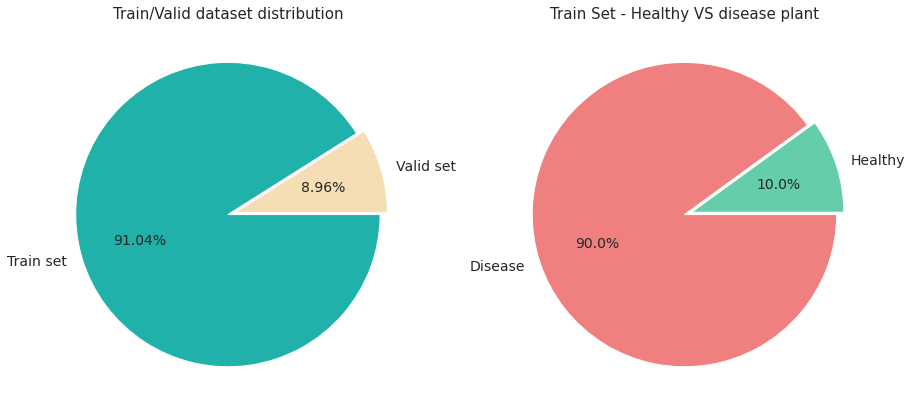

In [11]:
# Plot Healthy VS Disease plant number
def plot_image_healthy_vs_disease(dataset_count):
    plt.rcParams['font.size'] = 14
    plt.pie([dataset_count.nb[dataset_count.Category=='healthy'].sum(), dataset_count.nb[dataset_count.Category!='healthy'].sum()],labels=["Healthy", "Disease"],autopct = lambda x: str(round(x, 1)) + '%',colors = ["mediumaquamarine","lightcoral"],shadow=False,explode=(0.05,0))


plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Train/Valid dataset distribution', fontsize=15)
plt.rcParams['font.size'] = 14
plt.pie([valid_count.nb.sum(), train_count.nb.sum()],labels=["Valid set", "Train set"],autopct = lambda x: str(round(x, 2)) + '%',colors = ["wheat","lightseagreen"],shadow=False,explode=(0.05,0))
plt.subplot(1,2,2)
plt.title('Train Set - Healthy VS disease plant', fontsize=15)
plot_image_healthy_vs_disease(train_count)
#plt.subplot(1,3,3)
#plt.title('Valid Set - Healthy VS disease plant', fontsize=15)
#plot_image_healthy_vs_disease(valid_count);

In [11]:
diseases = os.listdir(train_dir)

In [12]:
# Inspecting classes of images in training directory
os.listdir(train_dir)

['Tomato___Target_Spot',
 'Tomato___Bacterial_spot',
 'Tomato___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Late_blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Leaf_Mold',
 'Tomato___Early_blight']

In [13]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 10


In [50]:
print(listdir(directory_root)[0])

val


In [14]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [52]:
# number of unique diseases
print("Number of diseases categories: {}".format(NumberOfDiseases))

Number of diseases categories: 9


In [53]:
print("Total  classes of Tomatoes are: {}".format(len(diseases)))

Total  classes of Tomatoes are: 10


In [19]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Tomato___Target_Spot                                    1000
Tomato___Bacterial_spot                                 1000
Tomato___healthy                                        1000
Tomato___Tomato_mosaic_virus                            1000
Tomato___Septoria_leaf_spot                             1000
Tomato___Late_blight                                    1000
Tomato___Spider_mites Two-spotted_spider_mite           1000
Tomato___Tomato_Yellow_Leaf_Curl_Virus                  1000
Tomato___Leaf_Mold                                      1000
Tomato___Early_blight                                   1000

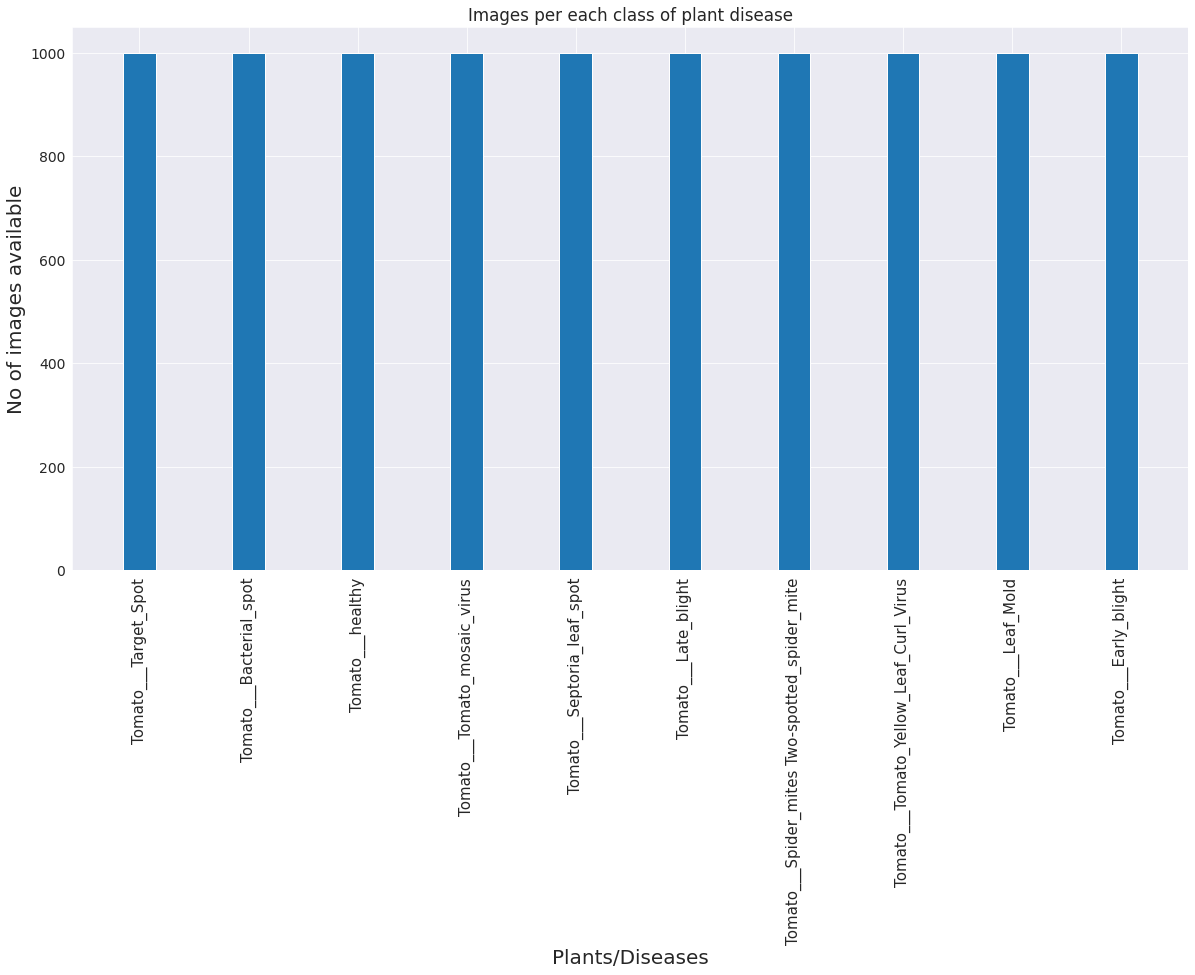

In [20]:
# plotting number of images available for each disease
index = [n for n in range(10)]
plt.figure(figsize=(20, 10))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=20)
plt.ylabel('No of images available', fontsize=20)
plt.xticks(index, diseases, fontsize=15, rotation=90)
plt.title('Images per each class of plant disease')
plt.show()

We can see that the dataset is balanced for all classes, so we are good to go forward

#### Images available for training

In [21]:
# Checking images total images for training
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 10000 images for training


In [15]:
#train_dir= '/content/drive/MyDrive/Tomato-leaves-dataset/train'
#valid_dir='/content/drive/MyDrive/Tomato-leaves-dataset/val'
for d in [train_dir, valid_dir]:
    filepaths = []
    labels=[] 
    classlist=sorted(os.listdir(d))
    for klass in classlist:
        label=klass.split('__')[1]
        classpath=os.path.join(d, klass)
        flist=sorted(os.listdir(classpath))
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)            
            labels.append(label)
    Fseries=pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')        
    if d == train_dir:
        df=pd.concat([Fseries, Lseries], axis=1)
    else:
        valid_df=pd.concat([Fseries, Lseries], axis=1)
train_df, test_df=train_test_split(df, train_size=.9, shuffle=True, random_state=123, stratify=df['labels'])   
print('train_df lenght: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))
# get the number of classes and the images count for each class in train_df
classes=sorted(list(train_df['labels'].unique()))
class_count = len(classes)
print('The number of classes in the dataset is: ', class_count)
groups=train_df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
countlist=[]
classlist=[]
for label in sorted(list(train_df['labels'].unique())):
    group=groups.get_group(label)
    countlist.append(len(group))
    classlist.append(label)
    print('{0:^30s} {1:^13s}'.format(label, str(len(group))))

# get the classes with the minimum and maximum number of train images
max_value=np.max(countlist)
max_index=countlist.index(max_value)
max_class=classlist[max_index]
min_value=np.min(countlist)
min_index=countlist.index(min_value)
min_class=classlist[min_index]
print(max_class, ' has the most images= ',max_value, ' ', min_class, ' has the least images= ', min_value)
# lets get the average height and width of a sample of the train images
ht=0
wt=0
# select 100 random samples of train_df
train_df_sample=train_df.sample(n=100, random_state=123,axis=0)
for i in range (len(train_df_sample)):
    fpath=train_df_sample['filepaths'].iloc[i]
    img=plt.imread(fpath)
    shape=img.shape
    ht += shape[0]
    wt += shape[1]
print('average height= ', ht//100, ' average width= ', wt//100, 'aspect ratio= ', ht/wt)

train_df lenght:  9000   test_df length:  1000   valid_df length:  984
The number of classes in the dataset is:  10
            CLASS               IMAGE COUNT 
       _Bacterial_spot              900     
        _Early_blight               900     
         _Late_blight               900     
          _Leaf_Mold                900     
     _Septoria_leaf_spot            900     
_Spider_mites Two-spotted_spider_mite      900     
         _Target_Spot               900     
_Tomato_Yellow_Leaf_Curl_Virus      900     
     _Tomato_mosaic_virus           900     
           _healthy                 900     
_Bacterial_spot  has the most images=  900   _Bacterial_spot  has the least images=  900
average height=  256  average width=  256 aspect ratio=  1.0


In [16]:
def trim(df, max_samples, min_samples, column):
    df=df.copy()
    groups=df.groupby(column)    
    trimmed_df = pd.DataFrame(columns = df.columns)
    groups=df.groupby(column)
    for label in df[column].unique(): 
        group=groups.get_group(label)
        count=len(group)    
        if count > max_samples:
            sampled_group=group.sample(n=max_samples, random_state=123,axis=0)
            trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
        else:
            if count>=min_samples:
                sampled_group=group        
                trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
    print('after trimming, the maximum samples in any class is now ',max_samples, ' and the minimum samples in any class is ', min_samples)
    return trimmed_df

max_samples=200 # since each class has more than 200 images all classes will be trimmed to have 20 images per class
min_samples=200
column='labels'
train_df= trim(train_df, max_samples, min_samples, column)

after trimming, the maximum samples in any class is now  200  and the minimum samples in any class is  200


In [17]:
working_dir=r'./'
img_size=(256,256)
batch_size=30 # We will use and EfficientetB3 model, with image size of (200, 250) this size should not cause resource error
trgen=ImageDataGenerator(horizontal_flip=True,rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2 )
t_and_v_gen=ImageDataGenerator()
msg='{0:70s} for train generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line
train_gen=trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
msg='{0:70s} for valid generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line
valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)
# for the test_gen we want to calculate the batch size and test steps such that batch_size X test_steps= number of samples in test set
# this insures that we go through all the sample in the test set exactly once.
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
msg='{0:70s} for test generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line
test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)
# from the generator we can get information we will need later
classes=list(train_gen.class_indices.keys())
class_indices=list(train_gen.class_indices.values())
class_count=len(classes)
labels=test_gen.labels
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)

Found 2000 validated image filenames belonging to 10 classes.
Found 984 validated image filenames belonging to 10 classes.
Found 1000 validated image filenames belonging to 10 classes.
test batch size:  50   test steps:  20  number of classes :  10


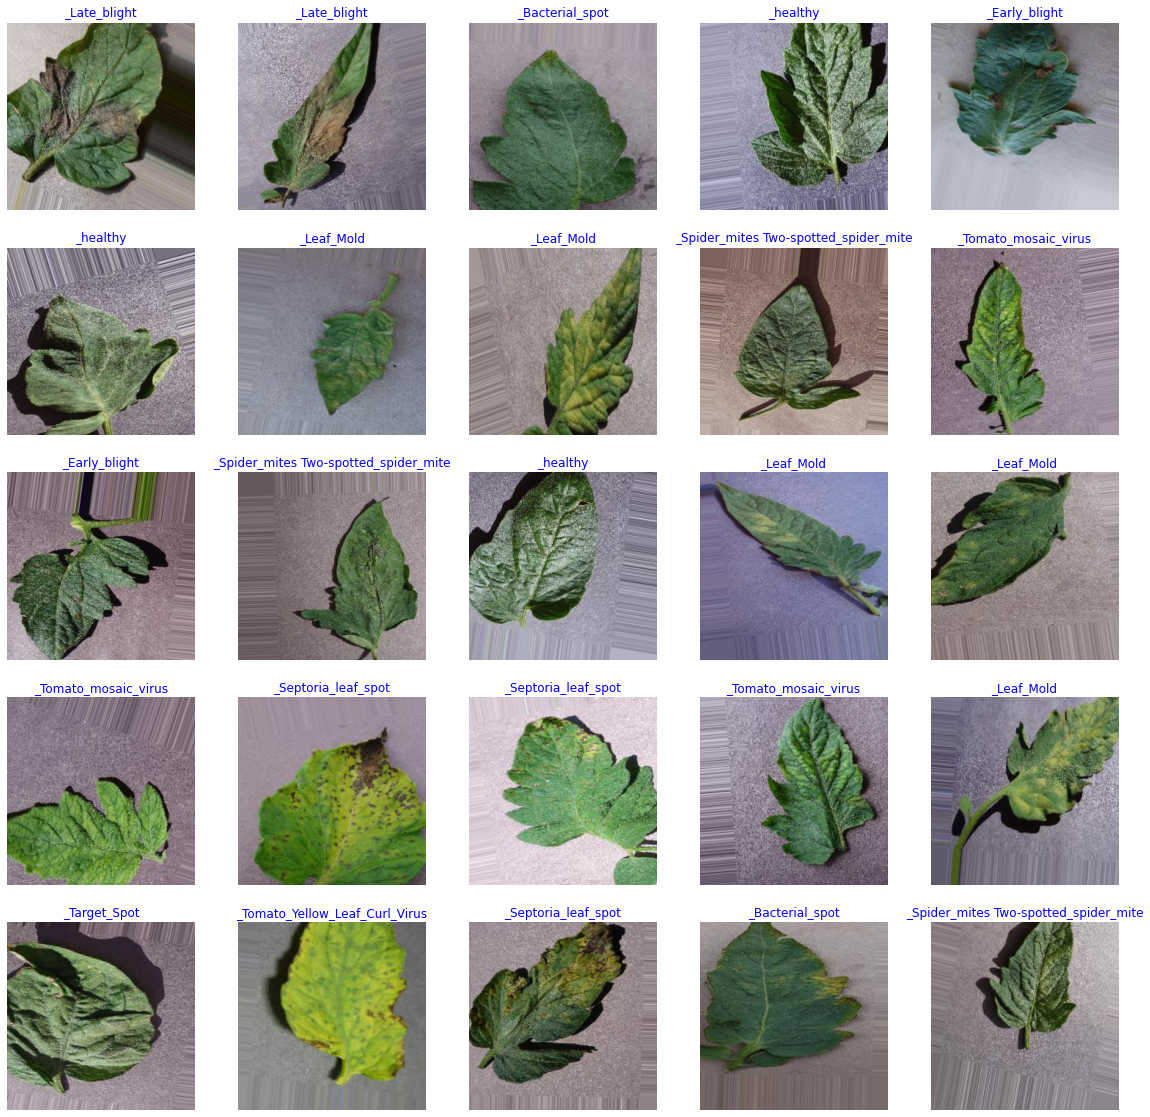

In [18]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i] /255       
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')
    plt.show()
    
show_image_samples(train_gen )

In [19]:
img_shape=(img_size[0], img_size[1], 3)
model_name='EfficientNetB3'
base_model=tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
# Note you are always told NOT to make the base model trainable initially- that is WRONG you get better results leaving it trainable
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)       
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
lr=.001 # start with this learning rate
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 

43950080/43941136 [==============================] - 2s 0us/step


In [20]:
class ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch): # initialization of the callback
        super(ASK, self).__init__()
        self.model=model               
        self.ask_epoch=ask_epoch
        self.epochs=epochs
        self.ask=True # if True query the user on a specified epoch
        
    def on_train_begin(self, logs=None): # this runs on the beginning of training
        if self.ask_epoch == 0: 
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs: # you are running for epochs but ask_epoch>epochs
            print('ask_epoch >= epochs, will train for ', epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            print('Training will proceed until epoch', ask_epoch,' then you will be asked to') 
            print(' enter H to halt training or enter an integer for how many more epochs to run then be asked again')  
        self.start_time= time.time() # set the time at which training started
        
    def on_train_end(self, logs=None):   # runs at the end of training     
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted         
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print (msg, flush=True) # print out training duration time
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                print('\n Enter H to end training or  an integer for the number of additional epochs to run then ask again')
                ans=input()
                
                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    print ('you entered ', ans, ' Training halted on epoch ', epoch+1, ' due to user input\n', flush=True)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        print ('you entered ', ans, ' Training will continue to epoch ', self.ask_epoch, flush=True)

In [21]:
epochs=40
ask_epoch=5
ask=ASK(model, epochs,  ask_epoch)
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2,verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, verbose=1,restore_best_weights=True)
callbacks=[rlronp, estop, ask]

In [22]:
history=model.fit(x=train_gen,  epochs=epochs, verbose=1, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

Training will proceed until epoch 5  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/40
67/67 [==============================] - 1547s 23s/step - loss: 8.4921 - accuracy: 0.6300 - val_loss: 8.2105 - val_accuracy: 0.6494 - lr: 0.0010
Epoch 2/40
67/67 [==============================] - 1422s 21s/step - loss: 6.6909 - accuracy: 0.8730 - val_loss: 6.4331 - val_accuracy: 0.8404 - lr: 0.0010
Epoch 3/40
67/67 [==============================] - 1450s 22s/step - loss: 5.5915 - accuracy: 0.9250 - val_loss: 5.2689 - val_accuracy: 0.9055 - lr: 0.0010
Epoch 4/40
67/67 [==============================] - 1454s 22s/step - loss: 4.6736 - accuracy: 0.9550 - val_loss: 4.4679 - val_accuracy: 0.9177 - lr: 0.0010
Epoch 5/40
67/67 [==============================] - ETA: 0s - loss: 3.9433 - accuracy: 0.9660 
 Enter H to end training or  an integer for the number of additional epochs to run then ask again
H
you entered  H  Trai

# 🍳 Data Preparation for training 🍳

In [3]:
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

#### Image shape 

In [4]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


We can see the shape (3, 256 256) of the image. 3 is the number of channels (RGB) and 256 x 256 is the width and height of the image

In [35]:
# total number of classes in train set
len(train.classes)

10

In [36]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

## 🖼️ Some Images from training dataset 🖼️

In [5]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

In [6]:
# setting the batch size
batch_size = 32

`batch_size` is the total number of images given as input at once in forward propagation of the CNN. Basically, batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network.

In [7]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

- `DataLoader` is a subclass which comes from `torch.utils.data`. It helps in loading large and memory consuming datasets. It takes in `batch_size` which denotes the number of samples contained in each generated batch. 

- Setting `shuffle=True` shuffles the dataset. It is heplful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.

- `num_workers`, denotes the number of processes that generate batches in parallel. If you have more cores in your CPU, you can set it to number of cores in your CPU. 

In [8]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

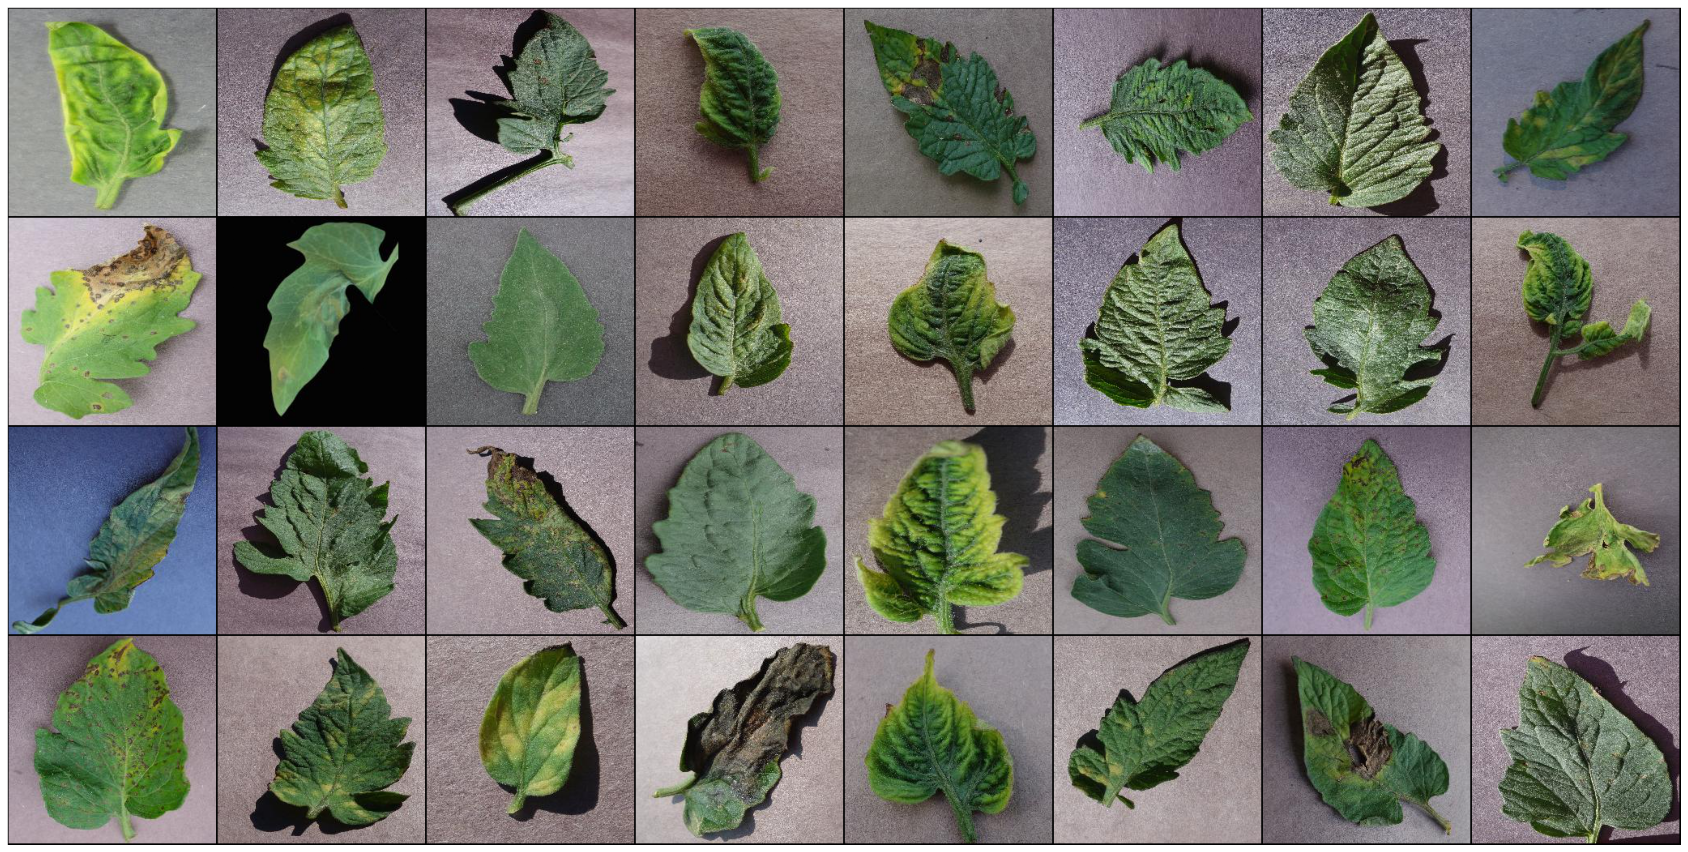

In [41]:
# Images for first batch of training
show_batch(train_dl) 

# 🏗️ Modelling 🏗️

It is advisable to use GPU instead of CPU when dealing with images dataset because CPUs are generalized for general purpose and GPUs are optimized for training deep learning models as they can process multiple computations simultaneously. They have a large number of cores, which allows for better computation of multiple parallel processes. Additionally, computations in deep learning need to handle huge amounts of data — this makes a GPU’s memory bandwidth most suitable.
To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required

#### Some helper functions

In [9]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Checking the device we are working with

In [10]:
device = get_default_device()
device

device(type='cuda')

Wrap up our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available

In [11]:
# Moving data into GPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## 👷 Building the model architecture 👷

*We are going to use **ResNet**, which have been one of the major breakthrough in computer vision since they were introduced in 2015.*

In ResNets, unlike in traditional neural networks, each layer feeds into the next layer, we use a network with residual blocks, each layer feeds into the next layer and directly into the layers about 2–3 hops away, to avoid over-fitting (a situation when validation loss stop decreasing at a point and then keeps increasing while training loss still decreases). This also helps in preventing [vanishing gradient problem](https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484) and allow us to train deep neural networks. Here is a simple residual block:

![image](https://www.mdpi.com/remotesensing/remotesensing-11-01896/article_deploy/html/images/remotesensing-11-01896-g001.png)

#### Residual Block code implementation

In [12]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

**Then we define our `ImageClassificationBase` class whose functions are:**

- `training_step` - To figure out how “wrong” the model is going after training or validation step.We are using this function other than just an accuracy metric that is likely not going to be differentiable (this would mean that the gradient can’t be determined, which is necessary for the model to improve during training)

A quick look at the PyTorch docs that yields the cost function: [cross_entropy](https://pytorch.org/docs/stable/nn.functional.html#cross-entropy).

- `validation_step` - Because an accuracy metric can’t be used while training the model, doesn’t mean it shouldn’t be implemented! Accuracy in this case would be measured by a threshold, and counted if the difference between the model’s prediction and the actual label is lower than that threshold.
- `validation_epoch_end` - We want to track the validation losses/accuracies and train losses after each epoch, and every time we do so we have to make sure the gradient is not being tracked.
- `epoch_end` - We also want to print validation losses/accuracies, train losses and learning rate too because we are using learning rate scheduler (which will change the learning rate after every batch of training) after each epoch.

We also define an `accuracy` function which calculates the overall accuracy of the model on an entire batch of outputs, so that we can use it as a metric in `fit_one_cycle`

In [13]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss, "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))
        

## 👷 Defining the final architecture of our model 👷

In [14]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


# resnet architecture 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out        

Now, we define a model object and transfer it into the device with which we are working...

In [15]:
# defining the model and moving it to the GPU
model = to_device(ResNet9(3, len(train.classes)), device) 
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [16]:
from torchsummary import summary  
import torch.nn.functional as F

In [17]:
# getting summary of the model
INPUT_SHAPE = (3, 256, 256)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

In [18]:
# for trainingl
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
            
    
        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history

In [19]:
%%time
history = [evaluate(model, valid_dl)]
history

CPU times: user 2.85 s, sys: 381 ms, total: 3.24 s
Wall time: 4.37 s


[{'val_loss': tensor(2.3029, device='cuda:0'), 'val_accuracy': tensor(0.1643)}]

In [20]:
epochs = 5
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [21]:
%%time
history += fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=1e-4, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00759, train_loss: 0.9100, val_loss: 12.0339, val_acc: 0.1946
Epoch [1], last_lr: 0.00950, train_loss: 0.7125, val_loss: 2.0771, val_acc: 0.6542
Epoch [2], last_lr: 0.00611, train_loss: 0.3277, val_loss: 0.4068, val_acc: 0.8525
Epoch [3], last_lr: 0.00188, train_loss: 0.1166, val_loss: 0.0816, val_acc: 0.9718
Epoch [4], last_lr: 0.00000, train_loss: 0.0387, val_loss: 0.0479, val_acc: 0.9829
CPU times: user 5min 9s, sys: 5min 38s, total: 10min 48s
Wall time: 10min 49s


### We got an accuracy of 99.2 % 🙌🙌

# 📈 Plotting 📈

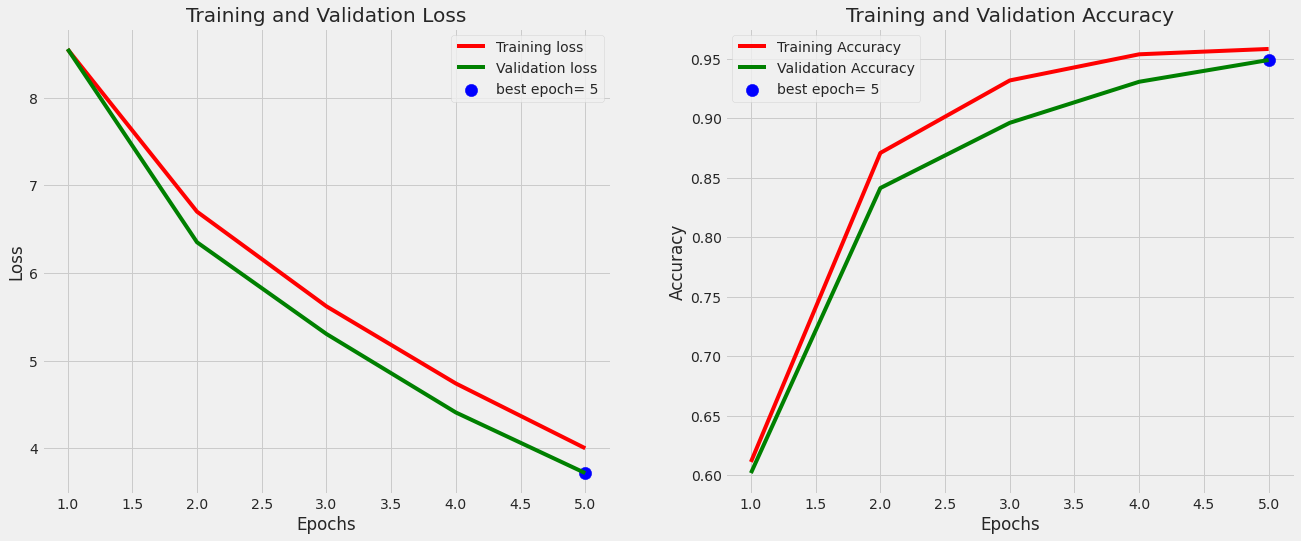

In [55]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    
tr_plot(history,0)

20/20 [==============================] - 169s 8s/step
there were 54 in 1000 tests for an accuracy of  94.60


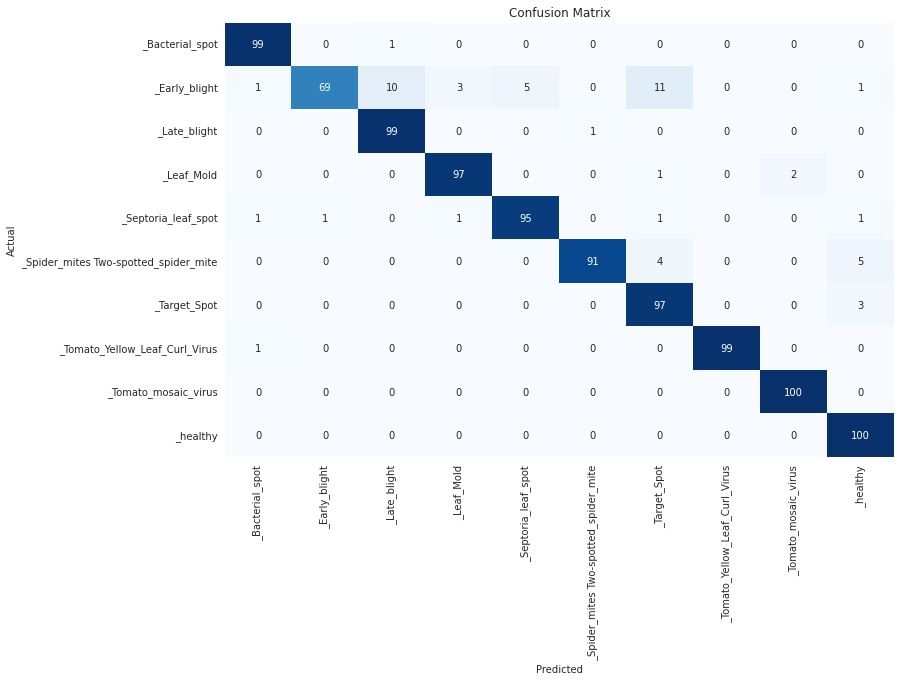

Classification Report:
----------------------
                                        precision    recall  f1-score   support

                      _Bacterial_spot     0.9706    0.9900    0.9802       100
                        _Early_blight     0.9857    0.6900    0.8118       100
                         _Late_blight     0.9000    0.9900    0.9429       100
                           _Leaf_Mold     0.9604    0.9700    0.9652       100
                  _Septoria_leaf_spot     0.9500    0.9500    0.9500       100
_Spider_mites Two-spotted_spider_mite     0.9891    0.9100    0.9479       100
                         _Target_Spot     0.8509    0.9700    0.9065       100
       _Tomato_Yellow_Leaf_Curl_Virus     1.0000    0.9900    0.9950       100
                 _Tomato_mosaic_virus     0.9804    1.0000    0.9901       100
                             _healthy     0.9091    1.0000    0.9524       100

                             accuracy                         0.9460      1000
   

In [23]:
def predictor(test_gen, test_steps):
    y_pred= []
    y_true=test_gen.labels
    classes=list(train_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, steps=test_steps, verbose=1) # predict on the test set
    tests=len(preds)
    for i, p in enumerate(preds):
            pred_index=np.argmax(p)         
            true_index=test_gen.labels[i]  # labels are integer values
            if pred_index != true_index: # a misclassification has occurred                                           
                errors=errors + 1
            y_pred.append(pred_index)
    acc=( 1-errors/tests) * 100
    print(f'there were {errors} in {tests} tests for an accuracy of {acc:6.2f}')
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests
errors, tests=predictor(test_gen, test_steps)

## 🧪 Testing model on test data 🧪

### We only have 20 images in test data, so let's check the model on all images

```
# This is formatted as code
```



In [27]:
test_dir = '/content/drive/MyDrive/test1'
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [28]:
test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

['Bacteria Spot1.JPG',
 'Bacteria Spot2.JPG',
 'Early Blight1.JPG',
 'Early Blight2.JPG',
 'Health1.JPG',
 'Health2.JPG',
 'Late blight1.JPG',
 'Late blight2.JPG',
 'Leaf Mold1.JPG',
 'Leaf Mold2.JPG',
 'Mosaic virus1.JPG',
 'Mosaic virus2.JPG',
 'Septoria leaf spot1.JPG',
 'Septoria leaf spot2.JPG',
 'Spotted mites two spotted mites1.JPG',
 'Spotted mites two spotted mites2.JPG',
 'Target spot1.JPG',
 'Target spot2.JPG',
 'Yellow leaf curl virus1.JPG',
 'Yellow leaf curl virus2.JPG']

In [29]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

Label: Bacteria Spot1.JPG , Predicted: Tomato___Bacterial_spot


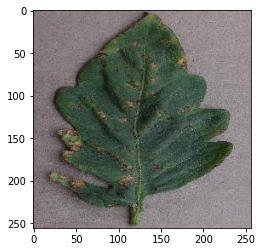

In [30]:
# predicting first image
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [31]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

Label: Bacteria Spot1.JPG , Predicted: Tomato___Bacterial_spot
Label: Bacteria Spot2.JPG , Predicted: Tomato___Bacterial_spot
Label: Early Blight1.JPG , Predicted: Tomato___Early_blight
Label: Early Blight2.JPG , Predicted: Tomato___Early_blight
Label: Health1.JPG , Predicted: Tomato___healthy
Label: Health2.JPG , Predicted: Tomato___healthy
Label: Late blight1.JPG , Predicted: Tomato___Late_blight
Label: Late blight2.JPG , Predicted: Tomato___Late_blight
Label: Leaf Mold1.JPG , Predicted: Tomato___Leaf_Mold
Label: Leaf Mold2.JPG , Predicted: Tomato___Leaf_Mold
Label: Mosaic virus1.JPG , Predicted: Tomato___Tomato_mosaic_virus
Label: Mosaic virus2.JPG , Predicted: Tomato___Tomato_mosaic_virus
Label: Septoria leaf spot1.JPG , Predicted: Tomato___Septoria_leaf_spot
Label: Septoria leaf spot2.JPG , Predicted: Tomato___Septoria_leaf_spot
Label: Spotted mites two spotted mites1.JPG , Predicted: Tomato___Spider_mites Two-spotted_spider_mite
Label: Spotted mites two spotted mites2.JPG , Predi

`We can see that the model predicted all the test images perfectly!!!!`

## Saving the model

In [32]:
# saving to the colab working directory
PATH = './plant-disease-model.pth'  
torch.save(model.state_dict(), PATH)

The model serves as input for generating predictions using flask application